<h1 align="center">Volume 4: Total Variation.</h1>

    NAME: Quin Daly
    Section #
    DATE: 02/22/22

In [74]:
import numpy as np
from numpy.random import random_integers, uniform, randn
from scipy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from imageio import imread, imwrite

ImportError: cannot import name 'imshow' from 'imageio' (/Users/quindaly/anaconda3/lib/python3.7/site-packages/imageio/__init__.py)

# Problem 1

Using 20 x steps, 250 time steps, and a final time of .2, plot the solution that
minimizes (17.4). It should match figure 17.1.

In [39]:
a, b = 1, -1
alpha, beta = 1., 7.

# Define variables
x_steps = 20
time_steps = 250
final_T = 0.2
delta_t = final_T/time_steps
delta_x = (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)

u = np.empty((2,x_steps+1))
initial_guess = (beta-alpha)/(b-a)*(x0-a) + alpha
u[0] = initial_guess
u[1] = u[0]

# Define the right hand side of difference scheme
# Time step until scheme converges
def rhs(y):
    # Approx first and second deriv to second order accuracy
    yp = (np.roll(y,-1) - np.roll(y,1)) / (2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1)) / (delta_x**2.)
    
    # Find approx for next t step using first order euler step
    y[1:-1] -= delta_t * (1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])
    
# Time step until successive iterations are close (convergence)
iteration = 0
tol = 1e-5
while iteration < time_steps:
    rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < tol:
        break
        
    u[0] = u[1]
    iteration += 1
    
print("Difference in iterations is ", norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

Difference in iterations is  0.0
Final time =  0.2


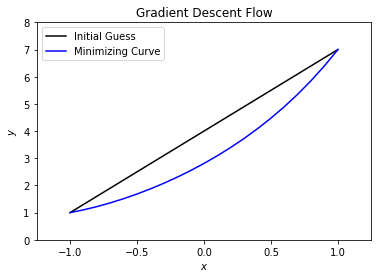

In [40]:
# Plot the minimizing curve with the initial guess u[0]
plt.plot(-x0, initial_guess, c='black', label='Initial Guess')
plt.plot(-x0, u[1], c='blue', label='Minimizing Curve')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([-1.25,1.25])
plt.ylim([0,8])
plt.legend()
plt.title('Gradient Descent Flow')
plt.show()

# Problem 2

Using 4t = 1e−3, λ = 40, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. (So Ω = [0, nx] × [0, ny], where nx and ny represent
the number of pixels in the x and y dimensions, respectively.) Take 250 steps in time. Compare
your results with Figure 17.3.

In [49]:
imagename = 'balloons_grey.jpg'
changed_pixels = 40000

# Read image
IM = imread(imagename, as_gray=True) / 255.
IM_x, IM_y = IM.shape

for lost in range(changed_pixels):
    x_, y_ = np.random.randint(1, IM_x - 2), np.random.randint(1, IM_y -2)
    val = 0.1 * randn() + 0.5
    IM[x_, y_] = max(min(val, 1.), 0.)
    
imwrite('noised_' + imagename, IM)
    

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [230]:
# initialize
dt = 1e-3
dx = 1
dy = 1
lam = 40
t_steps = 250
noisy_IM = imread('noised_balloons_grey.jpg', as_gray=True) / 255.
IM_x, IM_y = noisy_IM.shape
u0 = noisy_IM
u1 = noisy_IM

In [231]:
u_xxs = []
u_ts = []
u_yys = []
for i in range(t_steps):
    u_t = (u1 - u0) / dt
    u_xx = (np.roll(u0,-1,axis=1) - 2*u0 + np.roll(u0,1,axis=1)) / dx**2
    u_yy = (np.roll(u0,-1,axis=0) - 2*u0 + np.roll(u0,1,axis=0)) / dy**2
    u_ts.append(u_t)
    u_xxs.append(u_xx)
    u_yys.append(u_yy)
    
    u0 = u1
    u1 = noisy_IM - u_t
    

    

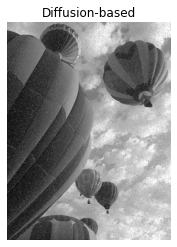

In [232]:
plt.imshow(u1, cmap='gray')
plt.axis('off')
plt.title('Diffusion-based')
plt.show()

# Problem 3

Using 4t = 1e − 3, λ = 1, 4x = 1, and 4y = 1, implement the numerical scheme
mentioned above to obtain a solution u. Take 200 steps in time. Compare your results with
Figure 17.3. How small should ε be?

In [233]:
# Initialize
dt = 1e-3
dx = 1
dy = 1
lam = 1
u_x = (np.roll(u,-1,axis=1) -  np.roll(u,1,axis=1))/2
u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.

In [234]:
u0 = noisy_IM*0.5
u1 = noisy_IM
for i in range(10):
    # Compute the derivatives
    u_t = (u1 - u0) / dt
    u_x = (np.roll(u,-1,axis=1) -  np.roll(u,1,axis=1))/2
    u_y = (np.roll(u,-1,axis=0) -  np.roll(u,1,axis=0))/2
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = (np.roll(u0,-1,axis=0) - 2*u0 + np.roll(u0,1,axis=0)) / dy**2
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.
    
    # Update u
    u0 = u1
    u1 = (u_xx*u_y**2 + u_yy*u_x**2 - 2*u_x*u_y*u_xy) / ((0.1 + u_x**2 + u_y**2)**(3/2)) - u_t + noisy_IM
    

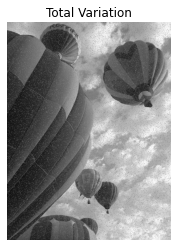

In [235]:
plt.imshow(u1, cmap='gray')
plt.title('Total Variation')
plt.axis('off')
plt.show()